In [240]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn  as sns

%matplotlib inline
import math

In [241]:
data = pd.read_csv(r'C:\Users\mansi\Documents\LetsUpgrade\Day 21\Logistic Regression\HR_Attrition_Modelling\Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [242]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [243]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [244]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [245]:
data.NumCompaniesWorked.mean() #Calculating mean 

2.6948303347756775

In [246]:
data["TotalWorkingYears"].mean()

11.279936378095888

In [247]:
data["NumCompaniesWorked"]= np.where(data["NumCompaniesWorked"].isnull(),2,data["NumCompaniesWorked"])#Filling null values with mean

In [248]:
data["TotalWorkingYears"]= np.where(data["TotalWorkingYears"].isnull(),11,data["TotalWorkingYears"])#Filling null values with mean

In [249]:
data.NumCompaniesWorked.isna().sum()

0

In [250]:
data.TotalWorkingYears.isna().sum()

0

In [251]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Attrition'] = label_encoder.fit_transform(data['Attrition'])
data["BusinessTravel"]=label_encoder.fit_transform(data["BusinessTravel"])

data["Department"]=label_encoder.fit_transform(data["Department"])
data["EducationField"]=label_encoder.fit_transform(data["EducationField"])
data["JobRole"]=label_encoder.fit_transform(data["JobRole"])
data["Over18"]=label_encoder.fit_transform(data["Over18"])
data["MaritalStatus"]=label_encoder.fit_transform(data["MaritalStatus"])

In [252]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,1,1,0,...,1.0,0,11,8,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,1,2,0,...,0.0,0,23,8,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,3,1,...,1.0,0,15,8,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,4,1,...,3.0,0,11,8,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,5,1,...,4.0,0,12,8,2,9.0,2,6,0,4


In [253]:
data.describe().T #spotting useless variables (std=0)

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
Attrition,4410.0,0.161224,0.367780,0.0,0.00,0.0,0.00,1.0
BusinessTravel,4410.0,1.607483,0.665304,0.0,1.00,2.0,2.00,2.0
Department,4410.0,1.260544,0.527673,0.0,1.00,1.0,2.00,2.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EducationField,4410.0,2.247619,1.331067,0.0,1.00,2.0,3.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
Gender,4410.0,0.600000,0.489954,0.0,0.00,1.0,1.00,1.0


In [254]:
#Dropping attributes with 0 std. # dropping EmployeeCount # StandardHours 
data= data.drop(["StandardHours", "EmployeeCount", "EmployeeID"], axis= 1)
data= data.drop(["Over18"], axis= 1)
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,0,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,0,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


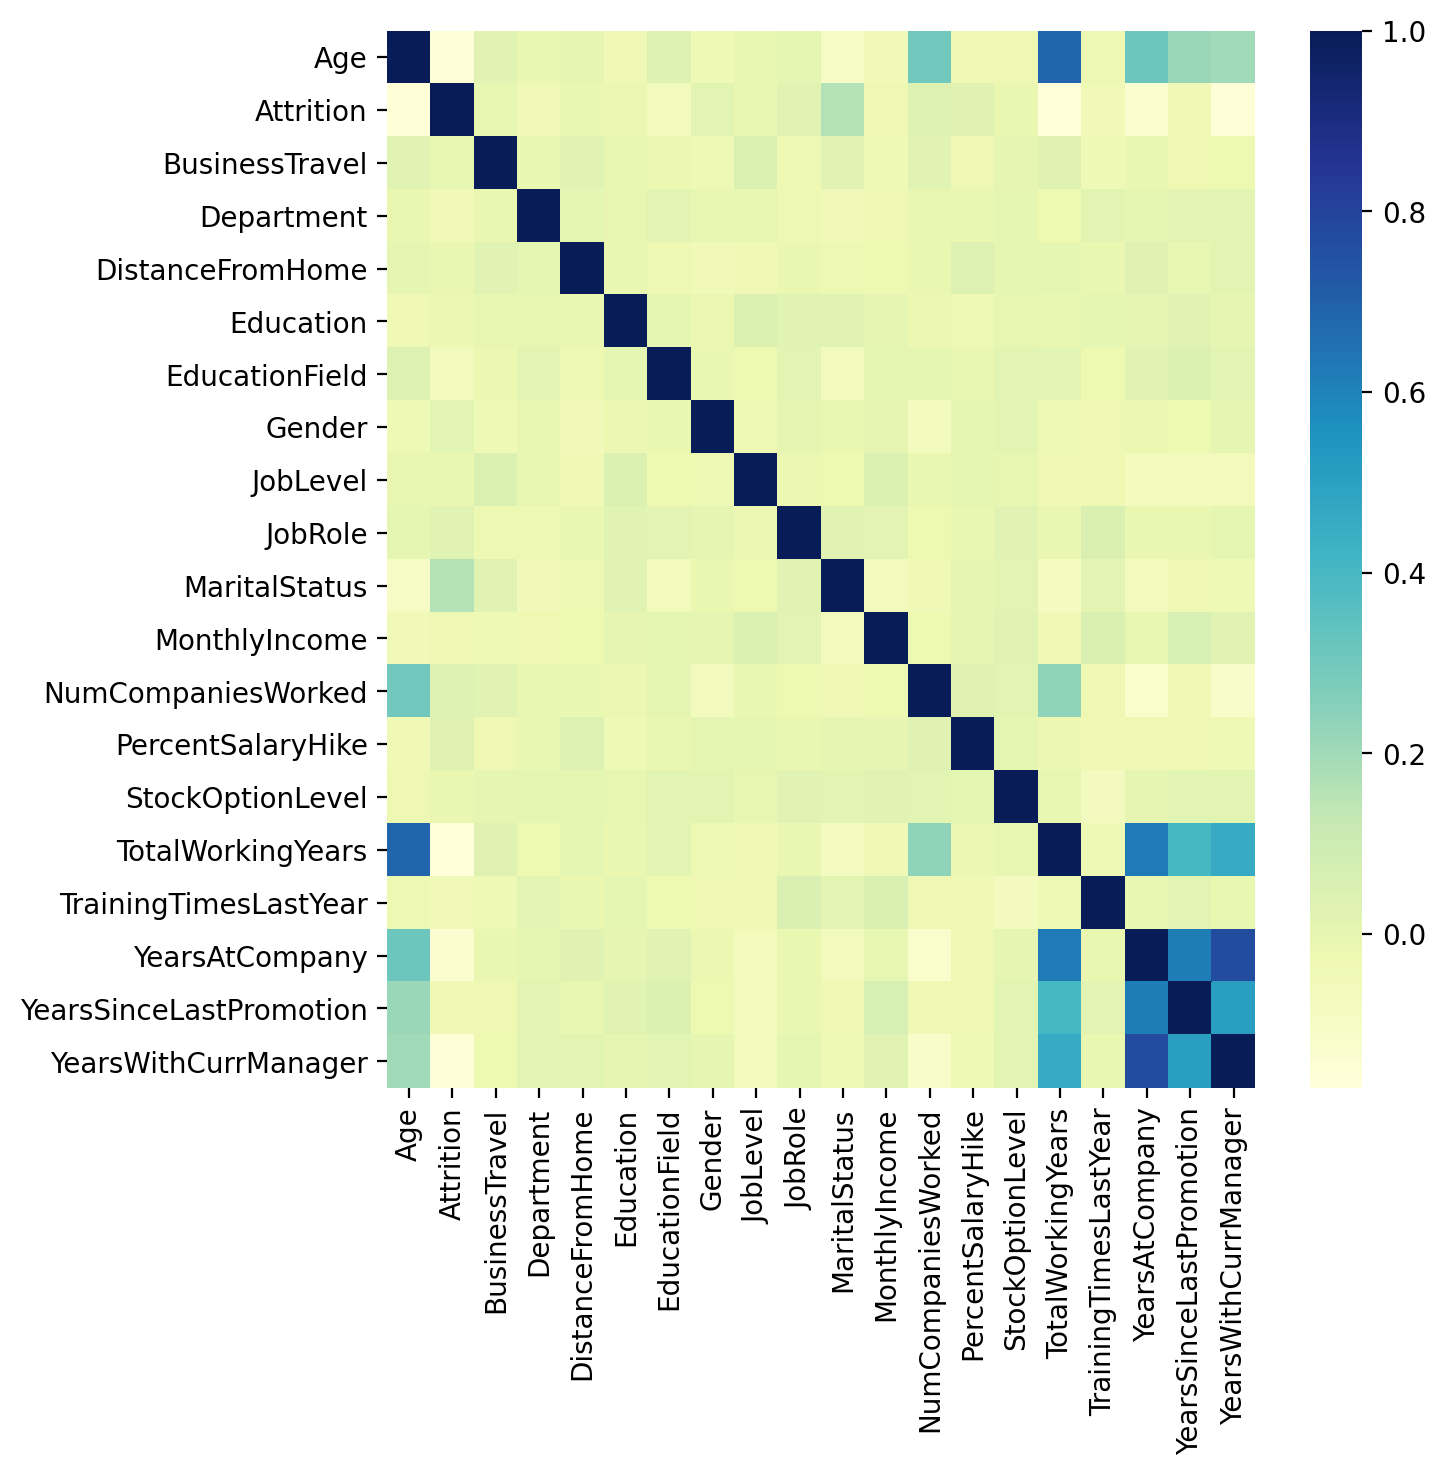

In [255]:
plt.figure(figsize= (7,7), dpi=200)
sns.heatmap(data.corr(), cmap="YlGnBu")

##### Personal Loan has moderate correlation with 'Income', 'CCAvg' & 'CD Account'. Further as we have to take care of the no multicollinearity, we have a very stron correltion between Income and CC Avg.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027C69C5BFD0>,
      dtype=object)

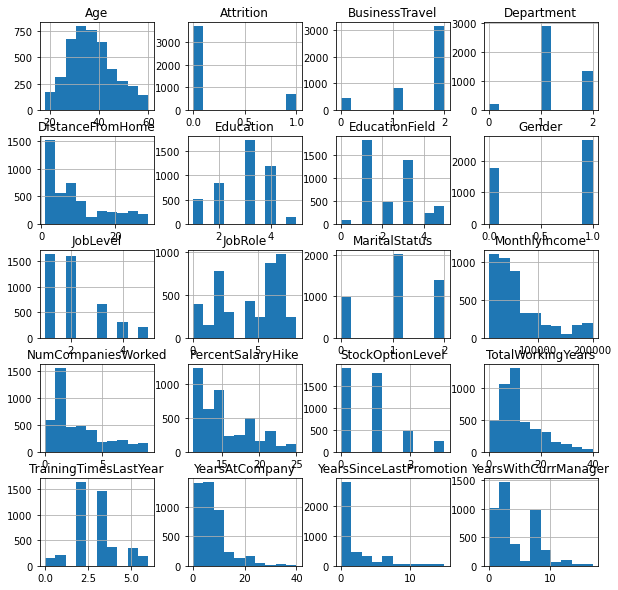

In [256]:
data.hist(figsize= (10,10))

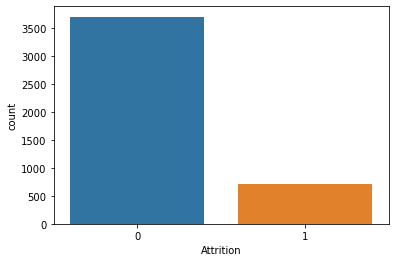

In [257]:
sns.countplot(x = 'Attrition', data=data)

In [258]:
data.isnull().sum().sum()

0

In [259]:
#Data splitting
target = data.iloc[:,1:2]

target.head()

,Attrition
0,0
1,1
2,0
3,0
4,0


In [260]:
x=data.drop(['Attrition'],axis=1)
x.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4
2,32,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3
3,38,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5
4,32,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4


In [261]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int32  
 2   BusinessTravel           4410 non-null   int32  
 3   Department               4410 non-null   int32  
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   int32  
 7   Gender                   4410 non-null   int32  
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   int32  
 10  MaritalStatus            4410 non-null   int32  
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4410 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

In [262]:
import statsmodels.api as sm #CHECKING IMPORTANT VARIABLES

x1=sm.add_constant(x)
logistic=sm.Logit(target,x1)
result=logistic.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.393027
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 4410
Model:                          Logit   Df Residuals:                     4390
Method:                           MLE   Df Model:                           19
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                  0.1102
Time:                        13:51:12   Log-Likelihood:                -1733.2
converged:                       True   LL-Null:                       -1947.9
Covariance Type:            nonrobust   LLR p-value:                 3.546e-79
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0769      0.414      0.186      0.852      -0.734       0.888
Age                        -0.0309      0.007     -4.524      0.000      -0.044      -0.018
BusinessTravel             -0.0177      0.065     -0.271      0.787      -0.146       0.111
Department                 -0.2423      0.081     -2.981      0.003      -0.402      -0.083
DistanceFromHome           -0.0013      0.005     -0.247      0.805      -0.012       0.009
Education                  -0.0627      0.043     -1.472      0.141      -0.146       0.021
EducationField             -0.0965      0.033     -2.893      0.004      -0.162      -0.031
Gender                      0.0861      0.090      0.962      0.336      -0.089       0.262
JobLevel                   -0.0240      0.040     -0.605      0.545      -0.102       0.054
JobRole                     0.0377      0.018      2.109      0.035       0.003       0.073
MaritalStatus               0.5886      0.063      9.320      0.000       0.465       0.712
MonthlyIncome           -1.876e-06   9.56e-07     -1.963      0.050   -3.75e-06   -2.58e-09
NumCompaniesWorked          0.1161      0.018      6.328      0.000       0.080       0.152
PercentSalaryHike           0.0118      0.012      1.004      0.315      -0.011       0.035
StockOptionLevel           -0.0640      0.052     -1.239      0.216      -0.165       0.037
TotalWorkingYears          -0.0574      0.012     -4.819      0.000      -0.081      -0.034
TrainingTimesLastYear      -0.1467      0.035     -4.172      0.000      -0.216      -0.078
YearsAtCompany              0.0120      0.018      0.655      0.512      -0.024       0.048
YearsSinceLastPromotion     0.1322      0.020      6.458      0.000       0.092       0.172
YearsWithCurrManager       -0.1395      0.022     -6.308      0.000      -0.183      -0.096
===========================================================================================
"""

#### p-value <= 0.05 is relevant. 
#### Dropping YearsAtCompany, StockoptionLevel,PercentSalaryHike, JobLevel, Gender, BusinessTravel, DistanceFromHome, Education from out data-set to as these attributes are not important as p-values> 0.05. 


In [265]:
x2= x.drop(["YearsAtCompany", "StockOptionLevel", "PercentSalaryHike", "JobLevel", "Gender", "DistanceFromHome", "BusinessTravel", "Education"], axis=1)
x2.head()

,Age,Department,EducationField,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager
0,51,2,1,0,1,131160,1.0,1.0,6,0,0
1,31,1,1,6,2,41890,0.0,6.0,3,1,4
2,32,1,4,7,1,193280,1.0,5.0,2,0,3
3,38,1,1,1,1,83210,3.0,13.0,5,7,5
4,32,1,3,7,2,23420,4.0,9.0,2,0,4


In [266]:
x3 = sm.add_constant(x2)
Logistic = sm.Logit(target,x3)
result = Logistic.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.393813
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 4410
Model:                          Logit   Df Residuals:                     4398
Method:                           MLE   Df Model:                           11
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                  0.1084
Time:                        13:57:20   Log-Likelihood:                -1736.7
converged:                       True   LL-Null:                       -1947.9
Covariance Type:            nonrobust   LLR p-value:                 1.110e-83
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0151      0.287      0.053      0.958      -0.546       0.577
Age                        -0.0306      0.007     -4.548      0.000      -0.044      -0.017
Department                 -0.2442      0.081     -3.017      0.003      -0.403      -0.086
EducationField             -0.0974      0.033     -2.925      0.003      -0.163      -0.032
JobRole                     0.0356      0.018      1.999      0.046       0.001       0.071
MaritalStatus               0.5826      0.063      9.267      0.000       0.459       0.706
MonthlyIncome           -1.948e-06   9.51e-07     -2.049      0.040   -3.81e-06   -8.47e-08
NumCompaniesWorked          0.1131      0.018      6.341      0.000       0.078       0.148
TotalWorkingYears          -0.0552      0.011     -5.235      0.000      -0.076      -0.035
TrainingTimesLastYear      -0.1445      0.035     -4.131      0.000      -0.213      -0.076
YearsSinceLastPromotion     0.1375      0.018      7.517      0.000       0.102       0.173
YearsWithCurrManager       -0.1306      0.019     -7.055      0.000      -0.167      -0.094
===========================================================================================
"""

In [267]:
from sklearn.model_selection import train_test_split

x_train, x_test, target_train, target_test = train_test_split(x2,target, test_size = 0.2, random_state = 0)

In [268]:
from sklearn.linear_model import LogisticRegression
lg= LogisticRegression()
lg.fit(x_train,target_train)

C:\Users\mansi\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [269]:
target_pred = lg.predict(x_test)
target_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [270]:
from sklearn.metrics import classification_report
print(classification_report(target_test,target_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       737
           1       0.00      0.00      0.00       145

    accuracy                           0.84       882
   macro avg       0.42      0.50      0.46       882
weighted avg       0.70      0.84      0.76       882



C:\Users\mansi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [271]:
from sklearn.metrics import confusion_matrix

In [272]:
confusion_matrix(target_test,target_pred) 

array([[737,   0],
       [145,   0]], dtype=int64)

In [273]:
from sklearn.metrics import accuracy_score
print(f"Model accuracy is {round((accuracy_score(target_test,target_pred))*100, 1)} %")

Model accuracy is 83.6 %
